In [1]:
from pathlib import Path
home = str(Path.home())
import sys
sys.path.append('{}/prog/msm/lib'.format(home))

In [2]:
import numpy as np
from simlib import *
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.set_cmap('rainbow')

<Figure size 432x288 with 0 Axes>

In [8]:
N = 10
gaussians = [gaussian(A = np.ones(2),
                      M = np.random.uniform(-10,10,size=2),
                      S = np.random.uniform(0.5,2.5,size=2))
             for _ in range(N)]

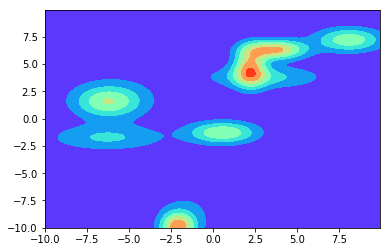

In [9]:
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sum(g.get_value([xx, yy]) for g in gaussians)
h = plt.contourf(x,y,z)

In [10]:
N = 1
parameters = {
    'name': 'equilibrium_test',
    'num_steps': 500000,
    'num_dim': 2,
    'num_particles': N,
    'beta': 1,
    'Ddt': 0.01,
    'x0': 0,
    'potential': potential(gaussians)
}

In [11]:
Xs = simulate(parameters)

In [12]:
t = parameters['num_steps']
d = parameters['num_dim']
n = parameters['num_particles']
Xs_all = Xs.reshape((t, d*n))

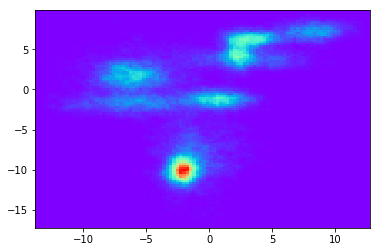

In [13]:
fig, ax = plt.subplots()
hist = ax.hist2d(Xs_all[:,0], Xs_all[:,1],bins=100)